# Example reading netcdf output using python xarray

Generate file 'test.nc' with:

    julia> include("MITgcm_2deg8_PO4MMcarbSCH4.jl")
    julia> PALEOmodel.OutputWriters.save_netcdf(paleorun.output, "MITgcm_PO4MMcarbSCH42deg8.nc")

In [2]:
# output_filename = "MITgcm_PO4MMcarbSCH42deg8.nc"
output_filename = "test_newnetcdf.nc"

In [3]:
import os

In [4]:
import numpy as np
import pandas as pd
import xarray as xr

In [5]:
os.getcwd()

'/home/sd336/PALEO/PALEOocean.jl/examples/mitgcm'

In [13]:
# read top-level dataset
ds = xr.open_dataset(output_filename, decode_cf=True)
ds.attrs

{'PALEO_netcdf_version': '0.2.0',
 'PALEO_domains': 'global ocean oceansurface oceanfloor fluxAtmtoOceansurface atm',
 'source': 'PALEOmodel https://github.com/PALEOtoolkit/PALEOmodel.jl',
 'title': 'PALEO (exo)Earth system model output'}

In [26]:
# read ocean group (= PALEO Domain ocean) from netcdf file
ds_ocean = xr.open_dataset(output_filename, group="ocean", decode_cf=True, decode_coords="all")
num_records = len(ds_ocean.tmodel)

# attach z coordinates (this is not automatic!)
# ds_ocean = ds_ocean.set_coords(["zmid", "zlower", "zupper"])

In [27]:
ds_ocean

<xarray.Dataset> Size: 61MB
Dimensions:                                     (zt: 15, lat: 64, lon: 128,
                                                 subdomain_oceansurface: 4448,
                                                 subdomain_oceanfloor: 4448,
                                                 tmodel: 5, bnds: 2)
Coordinates:
  * subdomain_oceansurface                      (subdomain_oceansurface) int64 36kB ...
  * subdomain_oceanfloor                        (subdomain_oceanfloor) int64 36kB ...
  * lat                                         (lat) float64 512B -88.59 ......
    lat_bnds                                    (lat, bnds) float64 1kB ...
  * lon                                         (lon) float64 1kB 1.406 ... 3...
    lon_bnds                                    (lon, bnds) float64 2kB ...
  * tmodel                                      (tmodel) float64 40B 0.0 ... ...
  * zt                                          (zt) float64 120B -25.0 ... -...
    zt_bnds                                     (zt, bnds) float64 240B ...
Dimensions without coordinates: bnds
Data variables: (12/22)
    linear_index                                (zt, lat, lon) float64 983kB ...
    Abox                                        (zt, lat, lon) float64 983kB ...
    O2                                          (tmodel, zt, lat, lon) float64 5MB ...
    O2_conc                                     (tmodel, zt, lat, lon) float64 5MB ...
    O2_sms                                      (tmodel, zt, lat, lon) float64 5MB ...
    O2_total                                    (tmodel) float64 40B ...
    ...                                          ...
    transportMITgcm%packed_transport_sequencer  (tmodel) float64 40B ...
    volume                                      (zt, lat, lon) float64 983kB ...
    volume_total                                float64 8B ...
    zlower                                      (zt, lat, lon) float64 983kB ...
    zmid                                        (zt, lat, lon) float64 983kB ...
    zupper                                      (zt, lat, lon) float64 983kB ...
Attributes: (12/15)
    record_dim_name:         tmodel
    record_dim_coordinates:  tmodel
    PALEO_GridType:          CartesianLinearGrid
    PALEO_columns:           4448
    PALEO_dimnames:          ['lon', 'lat', 'zt']
    PALEO_dimnames_extra:    bnds
    ...                      ...
    PALEO_zidxsurface:       1
    PALEO_display_mult:      [1. 1. 1.]
    grid_coords_lat:         ['lat', 'lat_bnds']
    grid_coords_zt:          ['zt', 'zt_bnds']
    grid_coords_lon:         ['lon', 'lon_bnds']
    data_dims:               []

<xarray.DataArray 'O2_total' (tmodel: 5)> Size: 40B
[5 values with dtype=float64]
Coordinates:
  * tmodel   (tmodel) float64 40B 0.0 0.2519 0.501 0.7502 1.002
Attributes: (12/14)
    operatorID:          1
    description:         total vector reservoir
    is_constant:         false
    space:               PALEOboxes.ScalarSpace
    domain_name:         ocean
    norm_value:          1.0
    ...                  ...
    field_data:          PALEOboxes.ScalarData
    initial_delta:       0.0
    units:               mol
    var_name:            O2_total
    initial_value:       0.0
    initialize_to_zero:  true


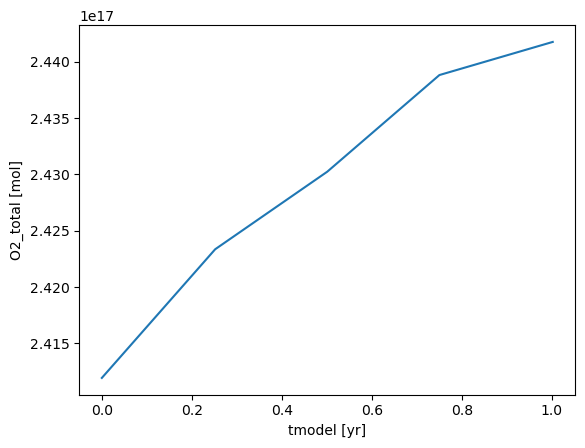

In [17]:
# timeseries for a scalar variable
print(ds_ocean["O2_total"])
ds_ocean["O2_total"].plot()

In [29]:
O2_conc = ds_ocean.O2_conc
O2_conc

<xarray.DataArray 'O2_conc' (tmodel: 5, zt: 15, lat: 64, lon: 128)> Size: 5MB
[614400 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 512B -88.59 -85.78 -82.97 ... 82.97 85.78 88.59
  * lon      (lon) float64 1kB 1.406 4.219 7.031 9.844 ... 353.0 355.8 358.6
  * tmodel   (tmodel) float64 40B 0.0 0.2519 0.501 0.7502 1.002
  * zt       (zt) float64 120B -25.0 -85.0 -170.0 ... -4.19e+03 -4.855e+03
Attributes: (12/21)
    gamma:                      missing
    operatorID:                 1
    description:                concentration
    is_constant:                false
    space:                      PALEOboxes.CellSpace
    domain_name:                ocean
    ...                         ...
    units:                      mol m-3
    specific_light_extinction:  0.0
    var_name:                   O2_conc
    initial_value:              0.0
    charge:                     missing
    diffusivity:                missing

In [30]:
O2_conc_last = ds_ocean.O2_conc.isel(tmodel=num_records-1) # NB: zero-based !
O2_conc_last

<xarray.DataArray 'O2_conc' (zt: 15, lat: 64, lon: 128)> Size: 983kB
[122880 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 512B -88.59 -85.78 -82.97 ... 82.97 85.78 88.59
  * lon      (lon) float64 1kB 1.406 4.219 7.031 9.844 ... 353.0 355.8 358.6
    tmodel   float64 8B 1.002
  * zt       (zt) float64 120B -25.0 -85.0 -170.0 ... -4.19e+03 -4.855e+03
Attributes: (12/21)
    gamma:                      missing
    operatorID:                 1
    description:                concentration
    is_constant:                false
    space:                      PALEOboxes.CellSpace
    domain_name:                ocean
    ...                         ...
    units:                      mol m-3
    specific_light_extinction:  0.0
    var_name:                   O2_conc
    initial_value:              0.0
    charge:                     missing
    diffusivity:                missing

In [31]:
# surface O2_conc at last timestep
O2_conc_last_surface = ds_ocean.O2_conc.isel(tmodel=num_records-1).isel(zt=0) # NB: zero-based !
O2_conc_last_surface

<xarray.DataArray 'O2_conc' (lat: 64, lon: 128)> Size: 66kB
[8192 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 512B -88.59 -85.78 -82.97 ... 82.97 85.78 88.59
  * lon      (lon) float64 1kB 1.406 4.219 7.031 9.844 ... 353.0 355.8 358.6
    tmodel   float64 8B 1.002
    zt       float64 8B -25.0
Attributes: (12/21)
    gamma:                      missing
    operatorID:                 1
    description:                concentration
    is_constant:                false
    space:                      PALEOboxes.CellSpace
    domain_name:                ocean
    ...                         ...
    units:                      mol m-3
    specific_light_extinction:  0.0
    var_name:                   O2_conc
    initial_value:              0.0
    charge:                     missing
    diffusivity:                missing

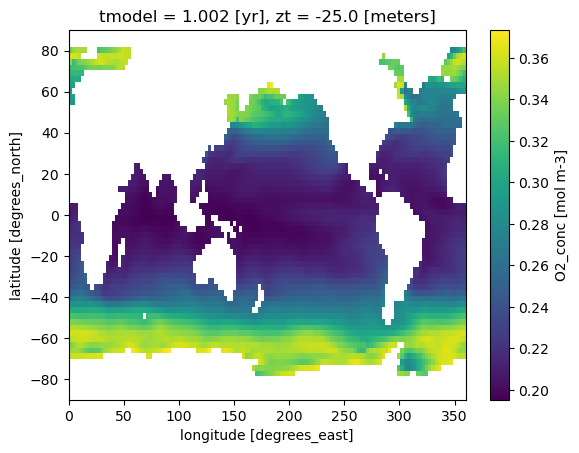

In [32]:
O2_conc_last_surface.plot()

In [33]:
# section O2_conc at last timestep
O2_conc_last_section = ds_ocean.O2_conc.isel(tmodel=num_records-1).sel(lon=200.0, method="nearest") # NB: zero-based !
O2_conc_last_section

<xarray.DataArray 'O2_conc' (zt: 15, lat: 64)> Size: 8kB
[960 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 512B -88.59 -85.78 -82.97 ... 82.97 85.78 88.59
    lon      float64 8B 201.1
    tmodel   float64 8B 1.002
  * zt       (zt) float64 120B -25.0 -85.0 -170.0 ... -4.19e+03 -4.855e+03
Attributes: (12/21)
    gamma:                      missing
    operatorID:                 1
    description:                concentration
    is_constant:                false
    space:                      PALEOboxes.CellSpace
    domain_name:                ocean
    ...                         ...
    units:                      mol m-3
    specific_light_extinction:  0.0
    var_name:                   O2_conc
    initial_value:              0.0
    charge:                     missing
    diffusivity:                missing

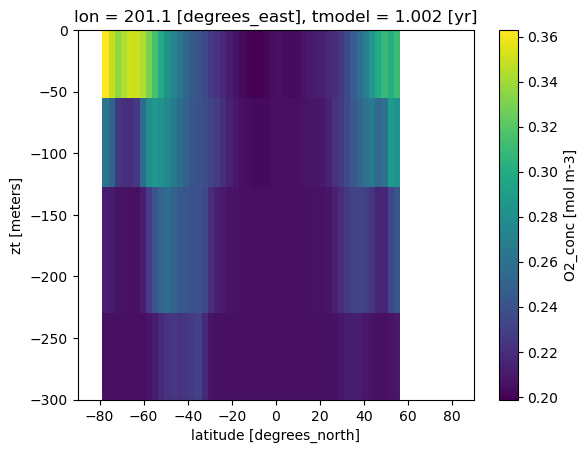

In [36]:
# demonstrates that xarray is not using bounds, but is guessing ? (cell vertical faces are in slighly wrong positions)
O2_conc_last_section.plot(ylim=(-300, 0))

In [ ]:
O2_conc_last_section.plot()

In [ ]:
# surface P_conc at last timestep
P_conc = ds_ocean.P_conc
P_conc

In [ ]:
# P_conc at last timestep
P_conc_last = ds_ocean.P_conc.isel(tmodel=num_records-1) # NB: zero-based !
P_conc_last

In [ ]:
# surface P_conc at last timestep
P_conc_last_surface = ds_ocean.P_conc.isel(tmodel=num_records-1).isel(zt=0) # NB: zero-based !
P_conc_last_surface

In [ ]:
P_conc_last_surface.plot()

In [ ]:
# section P_conc at last timestep
P_conc_last_section = ds_ocean.P_conc.isel(tmodel=num_records-1).sel(lon=200.0, method="nearest") # NB: zero-based !
P_conc_last_section

In [ ]:
P_conc_last_section.plot()

In [ ]:
# sections by faceting

P_conc_last_3sections = ds_ocean.P_conc.isel(tmodel=num_records-1).sel(lon=[70.0, 200.0, 340.0], method="nearest") # NB: zero-based !
P_conc_last_3sections

In [ ]:
P_conc_last_3sections.plot(col="lon", col_wrap=3)

In [ ]:
# O_conc at last timestep
O2_conc_last_3sections = ds_ocean.O2_conc.isel(tmodel=num_records-1).sel(lon=[70.0, 200.0, 340.0], method="nearest") # NB: zero-based !
O2_conc_last_3sections.plot(col="lon", col_wrap=3, vmin=0)

# H2S_conc at last timestep
H2S_conc_last_3sections = ds_ocean.H2S_conc.isel(tmodel=num_records-1).sel(isotopelinear="total").sel(lon=[70.0, 200.0, 340.0], method="nearest") # NB: zero-based !
H2S_conc_last_3sections.plot(col="lon", col_wrap=3, vmin=0)

# H2S d34S at last timestep
H2S_d34S_last_3sections = ds_ocean.H2S_conc.isel(tmodel=num_records-1).sel(isotopelinear="delta").sel(lon=[70.0, 200.0, 340.0], method="nearest") # NB: zero-based !
H2S_d34S_last_3sections.plot(col="lon", col_wrap=3)

# CH4_conc at last timestep
CH4_conc_last_3sections = ds_ocean.CH4_conc.isel(tmodel=num_records-1).sel(isotopelinear="total").sel(lon=[70.0, 200.0, 340.0], method="nearest") # NB: zero-based !
CH4_conc_last_3sections.plot(col="lon", col_wrap=3, vmin=0)

# CH4 d13C at last timestep
CH4_d13C_last_3sections = ds_ocean.CH4_conc.isel(tmodel=num_records-1).sel(isotopelinear="delta").sel(lon=[70.0, 200.0, 340.0], method="nearest") # NB: zero-based !
CH4_d13C_last_3sections.plot(col="lon", col_wrap=3)

In [ ]:
# column at ~Pacific OMZ

H2S_conc_PacOMZ = ds_ocean.H2S_conc.isel(tmodel=num_records-1).sel(isotopelinear="total").sel(lon=260, lat=0, method="nearest") # NB: zero-based !

H2S_conc_PacOMZ

In [ ]:
# columns from 3 lon sections at lat = 0
H2S_conc_depth_3lon = ds_ocean.H2S_conc.isel(tmodel=num_records-1).sel(isotopelinear="total").sel(lon=[70.0, 200.0, 260.0, 340.0], lat=0, method="nearest") 
H2S_conc_depth_3lon.plot.line(y="zmid", hue="lon")
# TODO - use zlower, zupper to create a stepped plot